## Step: 1 Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Step: 2 Reading and Understanding the data

In [3]:
#Importing the data set
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.max_colwidth= 150

In [5]:
# Importing the data dictionary
lead_dict = pd.read_excel("Leads Data Dictionary.xlsx", header=2)

lead_dict.head(100)

,Unnamed: 0,Variables,Description
0,NaN,Prospect ID,A unique ID with which the customer is identified.
1,NaN,Lead Number,A lead number assigned to each lead procured.
2,NaN,Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
3,NaN,Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
4,NaN,Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
5,NaN,Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
6,NaN,Converted,The target variable. Indicates whether a lead has been successfully converted or not.
7,NaN,TotalVisits,The total number of visits made by the customer on the website.
8,NaN,Total Time Spent on Website,The total time spent by the customer on the website.
9,NaN,Page Views Per Visit,Average number of pages on the website viewed during the visits.


In [6]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
lead_df.shape

(9240, 37)

In [8]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Let's check if there are any duplicate values
lead_df[lead_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


So There no duplicate values, as we can see above (0 rows)

In [10]:
len(lead_df)

9240

In [11]:
# Let's Check the Missing values in the dataset
round(lead_df.isnull().sum()/len(lead_df)*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

- There are many columns having missing values more then 30%.

In [12]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- As from above dataframe display we can see that there few columns which have values as "Select".
- Which might be beacause of those people might have opted not to answer those question
- Such columns are: 
    - "Specialization", 
    - "How did you hear about X Education"
    - "Lead Profile"
    - "City"

In [13]:
# Let's replace the "Select" with NaN to above mentioned columns
lead_df["Specialization"] = lead_df["Specialization"].replace("Select", np.nan)
lead_df["How did you hear about X Education"] = lead_df["How did you hear about X Education"].replace("Select", np.nan)
lead_df["Lead Profile"] = lead_df["Lead Profile"].replace("Select", np.nan)
lead_df["City"] = lead_df["City"].replace("Select", np.nan)

In [14]:
# Let's Check again the missing values(null values) after the replacement to NaN.
round(lead_df.isnull().sum()/len(lead_df)*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [15]:
# Let's make a list of columns which have more then 35% Missing(Null) values
lead_null_percentage = round(lead_df.isnull().sum()/len(lead_df)*100,2).sort_values(ascending = False)
list_null_more_then_35_percent = lead_null_percentage[lead_null_percentage > 35].index
list_null_more_then_35_percent

Index(['How did you hear about X Education', 'Lead Profile', 'Lead Quality',
       'Asymmetrique Profile Score', 'Asymmetrique Activity Score',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'City',
       'Specialization', 'Tags'],
      dtype='object')

In [16]:
#Let's Check the infromation about these(null_value_column)
def col_des(list1):
    return lead_dict[lead_dict["Variables"].isin(list1)]
col_des(list_null_more_then_35_percent)

,Unnamed: 0,Variables,Description
12,NaN,Specialization,The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this...
13,NaN,How did you hear about X Education,The source from which the customer heard about X Education.
24,NaN,Tags,Tags assigned to customers indicating the current status of the lead.
25,NaN,Lead Quality,Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
28,NaN,Lead Profile,A lead level assigned to each customer based on their profile.
29,NaN,City,The city of the customer.
30,NaN,Asymmetrique Activity Index,An index and score assigned to each customer based on their activity and their profile
31,NaN,Asymmetrique Profile Index,NaN
32,NaN,Asymmetrique Activity Score,NaN
33,NaN,Asymmetrique Profile Score,NaN


- From above discription we can say that these column are having much importance and these have more then 35% null values
- so we can drop these columns

In [17]:
# Lets drop the columns with more than 35% null values
lead_df = lead_df.drop(labels=list_null_more_then_35_percent, axis=1)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [18]:
# Let's Check again the missing values(null values) after the replacement to NaN.
round(lead_df.isnull().sum()/len(lead_df)*100,2).sort_values(ascending = False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

In [19]:
lead_df.shape

(9240, 27)

In [20]:
# Lets check the unique values for columns having null values
lead_df["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
# Lets check the unique values for columns having null values
lead_df["What matters most to you in choosing a course"].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

- As we can see that in "What matters most to you in choosing a course" the 99% have choosen 
- Better Career Prospects, so there is not much of variance in the categories, and this column has
- 29% null values , so we can drop this column

In [22]:
lead_df = lead_df.drop(labels="What matters most to you in choosing a course", axis=1)

In [23]:
# Lets check the unique values for columns having null values
lead_df["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
# for "What is your current occupation" we can create a new category "Info not available"
lead_df["What is your current occupation"] = lead_df["What is your current occupation"].replace(np.nan, "Info not available")

In [25]:
round(lead_df.isnull().sum()/len(lead_df)*100,2).sort_values(ascending = False)

Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Prospect ID                                  0.00
X Education Forums                           0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
Search                                       0.00
Newspaper Article                            0.00
Magazine                                     0.00
Lead Number                                  0.00
What is your current occupation              0.00


In [26]:
lead_df.Country.value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

- As we can see that in "Country" column have the 95% india value
so there is not much of variance in the categories, and this column has
26% null values , so we can drop this column

In [27]:
lead_df = lead_df.drop(labels="Country",axis=1)

In [28]:
lead_df["TotalVisits"].value_counts(normalize=True)*100

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0      0.032956
29.0      0.021971
28.0      0.021971
26.0      0.021971
141.0     0.010985
55.0      0.010985
30.0      0.010985
43.0      0.010985
74.0      0.010985
41.0      0.010985
54.0      0.010985
115.0     0.010985
251.0     0.010985
32.0      0.010985
42.0      0.010985
Name: TotalVisits, dtype: float64

- we can impute the null values in "Total Visits" with median of the Column

In [29]:
Total_visit_median = lead_df["TotalVisits"].median()
Total_visit_median

3.0

In [30]:
lead_df["TotalVisits"] = lead_df["TotalVisits"].replace(np.nan, Total_visit_median)

In [31]:
lead_df["Page Views Per Visit"].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.80        9
14.00       9
4.33        9
2.20        9
2.17        8
1.60        8
3.25        8
2.40        6
13.00       6
12.00       5
1.20        5
1.83        4
3.40        4
2.60        4
1.43        4
15.00       4
1.71        4
1.78        3
4.25        3
16.00       3
4.75        3
5.67        3
1.57        3
1.38        3
3.60        2
1.23        2
1.56        2
5.40        2
2.22        2
7.50        2
1.14        2
5.25        2
2.09        2
3.20        2
3.75        2
5.33        2
2.83        2
2.71        2
1.22        2
2.13        1
1.54        1
6.67  

- we can impute the null values in "Page Views Per Visit" with median of the Column

In [32]:
Page_Views_Per_Visit_median = lead_df["Page Views Per Visit"].median()
Page_Views_Per_Visit_median

2.0

In [33]:
lead_df["Page Views Per Visit"] = lead_df["Page Views Per Visit"].replace(np.nan, Page_Views_Per_Visit_median)


In [34]:
lead_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [35]:
# For null values in "Last Activity" column we do have sufficient infromation to impute 
# so we will create a new category "Cannot Say"

lead_df["Last Activity"] = lead_df["Last Activity"].replace(np.nan, "Cannot Say")

In [36]:
lead_df["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Cannot Say                       103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
lead_df["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

- From above we can see that there are 2 "Google" category so convert them into one
- As there the majour frequent choice is "Google" so we can impute "Google" for null value

In [38]:
lead_df["Lead Source"] = lead_df["Lead Source"].replace("google", "Google")
lead_df["Lead Source"] = lead_df["Lead Source"].replace(np.nan, "Google")

In [39]:
lead_df["Lead Source"].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [40]:
# Lets check the present situation of null values on the data set
round(lead_df.isnull().sum()/len(lead_df)*100,2).sort_values(ascending = False)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                             

- So, now there is no column having null values , all have treated

In [41]:
lead_df.head(50)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,Info not available,No,No,No,No,No,No,No,No,No,No,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,Info not available,No,No,No,No,No,No,No,No,No,No,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,Info not available,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.00,Email Opened,Info not available,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened


In [42]:
lead_df["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [43]:
lead_df.tail(50)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9190,cc92e085-aaa5-467a-a063-7c2c652e3684,579941,Landing Page Submission,Google,No,No,0,4.0,346,4.00,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent
9191,606e0bda-3005-4675-bb0c-6d256f3f7744,579930,Landing Page Submission,Direct Traffic,No,No,0,4.0,282,1.33,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
9192,40593f06-5bdb-440d-9a9e-402c7b2e14dc,579928,Landing Page Submission,Google,No,No,1,9.0,287,3.00,Page Visited on Website,Student,No,No,No,No,No,No,No,No,No,No,No,No,Modified
9193,04b36f06-8e3e-4c99-9112-f162a2d1efc6,579926,Landing Page Submission,Direct Traffic,No,No,0,3.0,50,3.00,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,SMS Sent
9194,c04ff256-e514-4054-a92c-c5621d1eacd1,579925,API,Organic Search,Yes,No,0,3.0,38,3.00,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Page Visited on Website
9195,70be864c-4bde-4c86-918d-deb8f9f52703,579920,Landing Page Submission,Direct Traffic,No,No,0,3.0,49,1.50,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,Yes,Modified
9196,61f5ddfd-f8aa-41d6-9d9e-b1766cfaf10f,579918,Landing Page Submission,Google,No,No,1,5.0,1490,5.00,SMS Sent,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,SMS Sent
9197,0f2b2e0e-e168-46ae-b7e2-4a7ccc1a7344,579906,Landing Page Submission,Google,No,No,1,5.0,483,5.00,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
9198,774f759d-edfb-4677-8917-1b8cc9168a8f,579900,Landing Page Submission,Google,No,No,0,4.0,83,4.00,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
9199,6eb89ae5-d1e0-4c19-8661-8f9545e0e408,579892,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [44]:
lead_df["Do Not Call"].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [45]:
lead_df["Do Not Email"].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [46]:
lead_df["Search"].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [47]:
lead_df["Newspaper Article"].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [48]:
lead_df["X Education Forums"].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [49]:
lead_df["Newspaper"].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [50]:
lead_df["Through Recommendations"].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [51]:
lead_df["Digital Advertisement"].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [52]:
lead_df["Magazine"].value_counts()

No    9240
Name: Magazine, dtype: int64

In [53]:
lead_df["Receive More Updates About Our Courses"].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [54]:
lead_df["Update me on Supply Chain Content"].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [55]:
lead_df["Get updates on DM Content"].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [56]:
lead_df["I agree to pay the amount through cheque"].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

- So we can see that following columns have only one response as "No", in this way these column does not have significance,
these can be droped as well.
    - Magazine
    - Receive More Updates About Our Courses
    - Update me on Supply Chain Content
    - Get updates on DM Content
    - I agree to pay the amount through cheque

In [57]:
list2 = ["Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content","Get updates on DM Content",
        "I agree to pay the amount through cheque"]
lead_df = lead_df.drop(labels=list2, axis=1)

In [58]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


In [59]:
lead_df.shape

(9240, 20)

In [60]:
#Lets Check the Outliers for nurecial data present in the data
lead_df.describe(percentiles=[0.25, 0.50,0.75,0.80,0.85,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
80%,641577.600000,1.000000,5.000000,1087.200000,4.000000
85%,645401.600000,1.000000,6.000000,1233.150000,4.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000


<AxesSubplot:ylabel='Page Views Per Visit'>

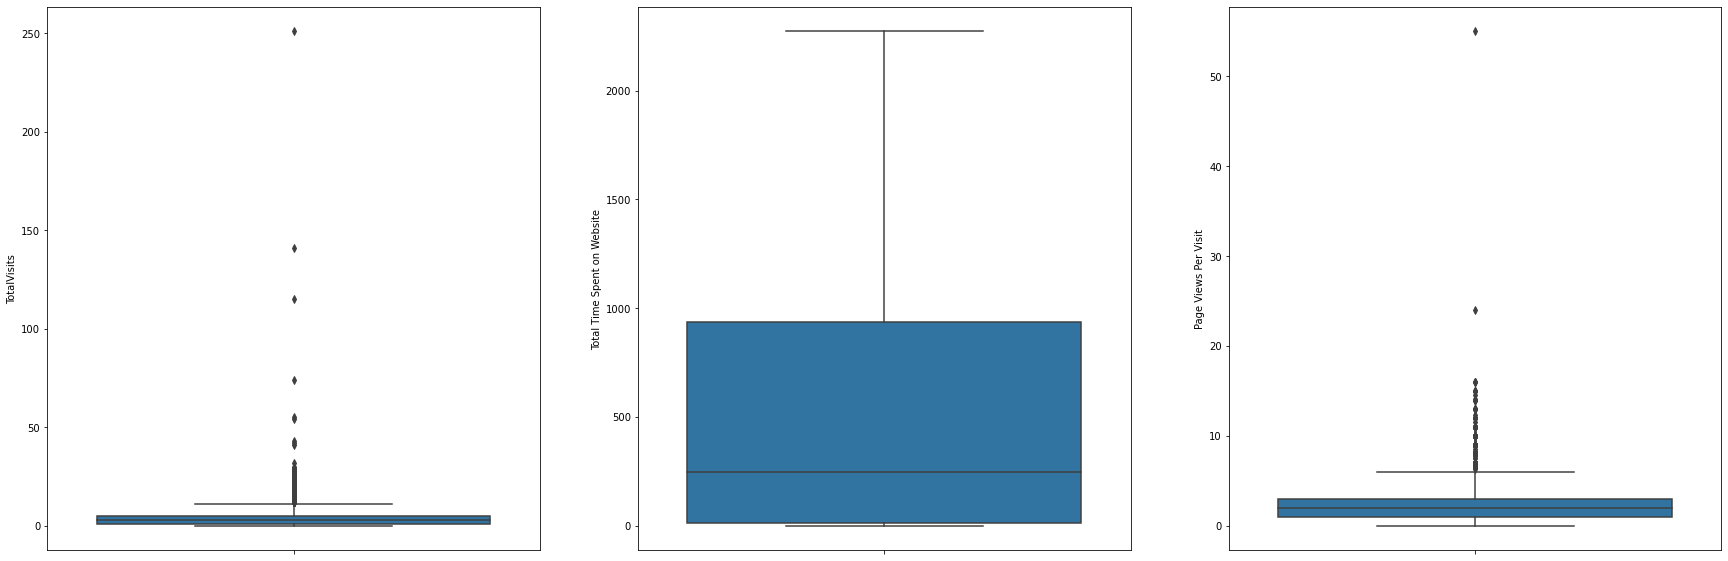

In [61]:
# Lets Draw the boxblot for "Total visits", "Total Time Spent on Website", "Page Views Per Visit"
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
sns.boxplot(y="TotalVisits",data=lead_df)
plt.subplot(1,3,2)
sns.boxplot(y="Total Time Spent on Website",data=lead_df)
plt.subplot(1,3,3)
sns.boxplot(y="Page Views Per Visit",data=lead_df)

In [62]:
# To treat the Outliers , removing values beyound 99 percentile
# "TotalVisits" till 99 percentile
outlier_TotalVisits = lead_df["TotalVisits"].quantile(0.99)
lead_df = lead_df[lead_df["TotalVisits"] <= outlier_TotalVisits]
lead_df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9157.000000,9157.000000,9157.000000,9157.000000,9157.000000
mean,617229.666921,0.384951,3.203888,486.189036,2.332225
std,23420.299927,0.486610,2.967759,547.695908,2.047285
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596507.000000,0.000000,1.000000,10.000000,1.000000
50%,615558.000000,0.000000,3.000000,247.000000,2.000000
75%,637414.000000,1.000000,5.000000,933.000000,3.000000
90%,650522.000000,1.000000,7.000000,1379.000000,5.000000
95%,655423.800000,1.000000,9.000000,1559.400000,6.000000
99%,659603.080000,1.000000,13.000000,1839.440000,9.000000


In [63]:
# To treat the Outliers , removing values beyound 99 percentile
# "Page Views Per Visit" till 99 percentile
outlier_TotalVisits = lead_df["Page Views Per Visit"].quantile(0.99)
lead_df = lead_df[lead_df["Page Views Per Visit"] <= outlier_TotalVisits]
lead_df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000,9090.000000,9090.000000
mean,617197.434763,0.384488,3.140924,484.243784,2.262836
std,23392.354280,0.486501,2.881884,547.243973,1.881164
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596502.500000,0.000000,1.000000,9.000000,1.000000
50%,615557.000000,0.000000,3.000000,246.000000,2.000000
75%,637360.750000,1.000000,4.000000,930.000000,3.000000
90%,650480.400000,1.000000,7.000000,1378.000000,5.000000
95%,655359.700000,1.000000,9.000000,1558.000000,6.000000
99%,659583.980000,1.000000,13.000000,1840.110000,8.000000


In [64]:
# To treat the Outliers , removing values beyound 99 percentile
# "Total Time Spent on Website" till 99 percentile
outlier_TotalVisits = lead_df["Total Time Spent on Website"].quantile(0.99)
lead_df = lead_df[lead_df["Total Time Spent on Website"] <= outlier_TotalVisits]
lead_df.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,617205.410935,0.381598,3.126458,469.314035,2.254057
std,23381.501147,0.485806,2.876816,529.263559,1.881047
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596520.000000,0.000000,1.000000,6.000000,1.000000
50%,615556.000000,0.000000,3.000000,240.000000,2.000000
75%,637368.500000,1.000000,4.000000,899.000000,3.000000
90%,650491.200000,1.000000,7.000000,1348.000000,5.000000
95%,655366.500000,1.000000,9.000000,1520.000000,6.000000
99%,659600.140000,1.000000,13.000000,1735.020000,8.000000


In [65]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


In [66]:
lead_df.shape

(8999, 20)

In [67]:
# Let's check how much data have retained
round(len(lead_df)/9240 * 100, 2)

97.39

- We have treated the null values and Outliers ,afterwards we are able to retain almost 98% data

## Step : 3 Univariate Analysis
   **Categorical Variable Analysis**

In [68]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8999 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8999 non-null   object 
 1   Lead Number                             8999 non-null   int64  
 2   Lead Origin                             8999 non-null   object 
 3   Lead Source                             8999 non-null   object 
 4   Do Not Email                            8999 non-null   object 
 5   Do Not Call                             8999 non-null   object 
 6   Converted                               8999 non-null   int64  
 7   TotalVisits                             8999 non-null   float64
 8   Total Time Spent on Website             8999 non-null   int64  
 9   Page Views Per Visit                    8999 non-null   float64
 10  Last Activity                           8999 non-null   obje

In [69]:
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


In [70]:
object_columns = lead_df.select_dtypes(include=['object']).columns
len(object_columns[1:])

14

In [71]:
list3 = list(object_columns[1:])
list3

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

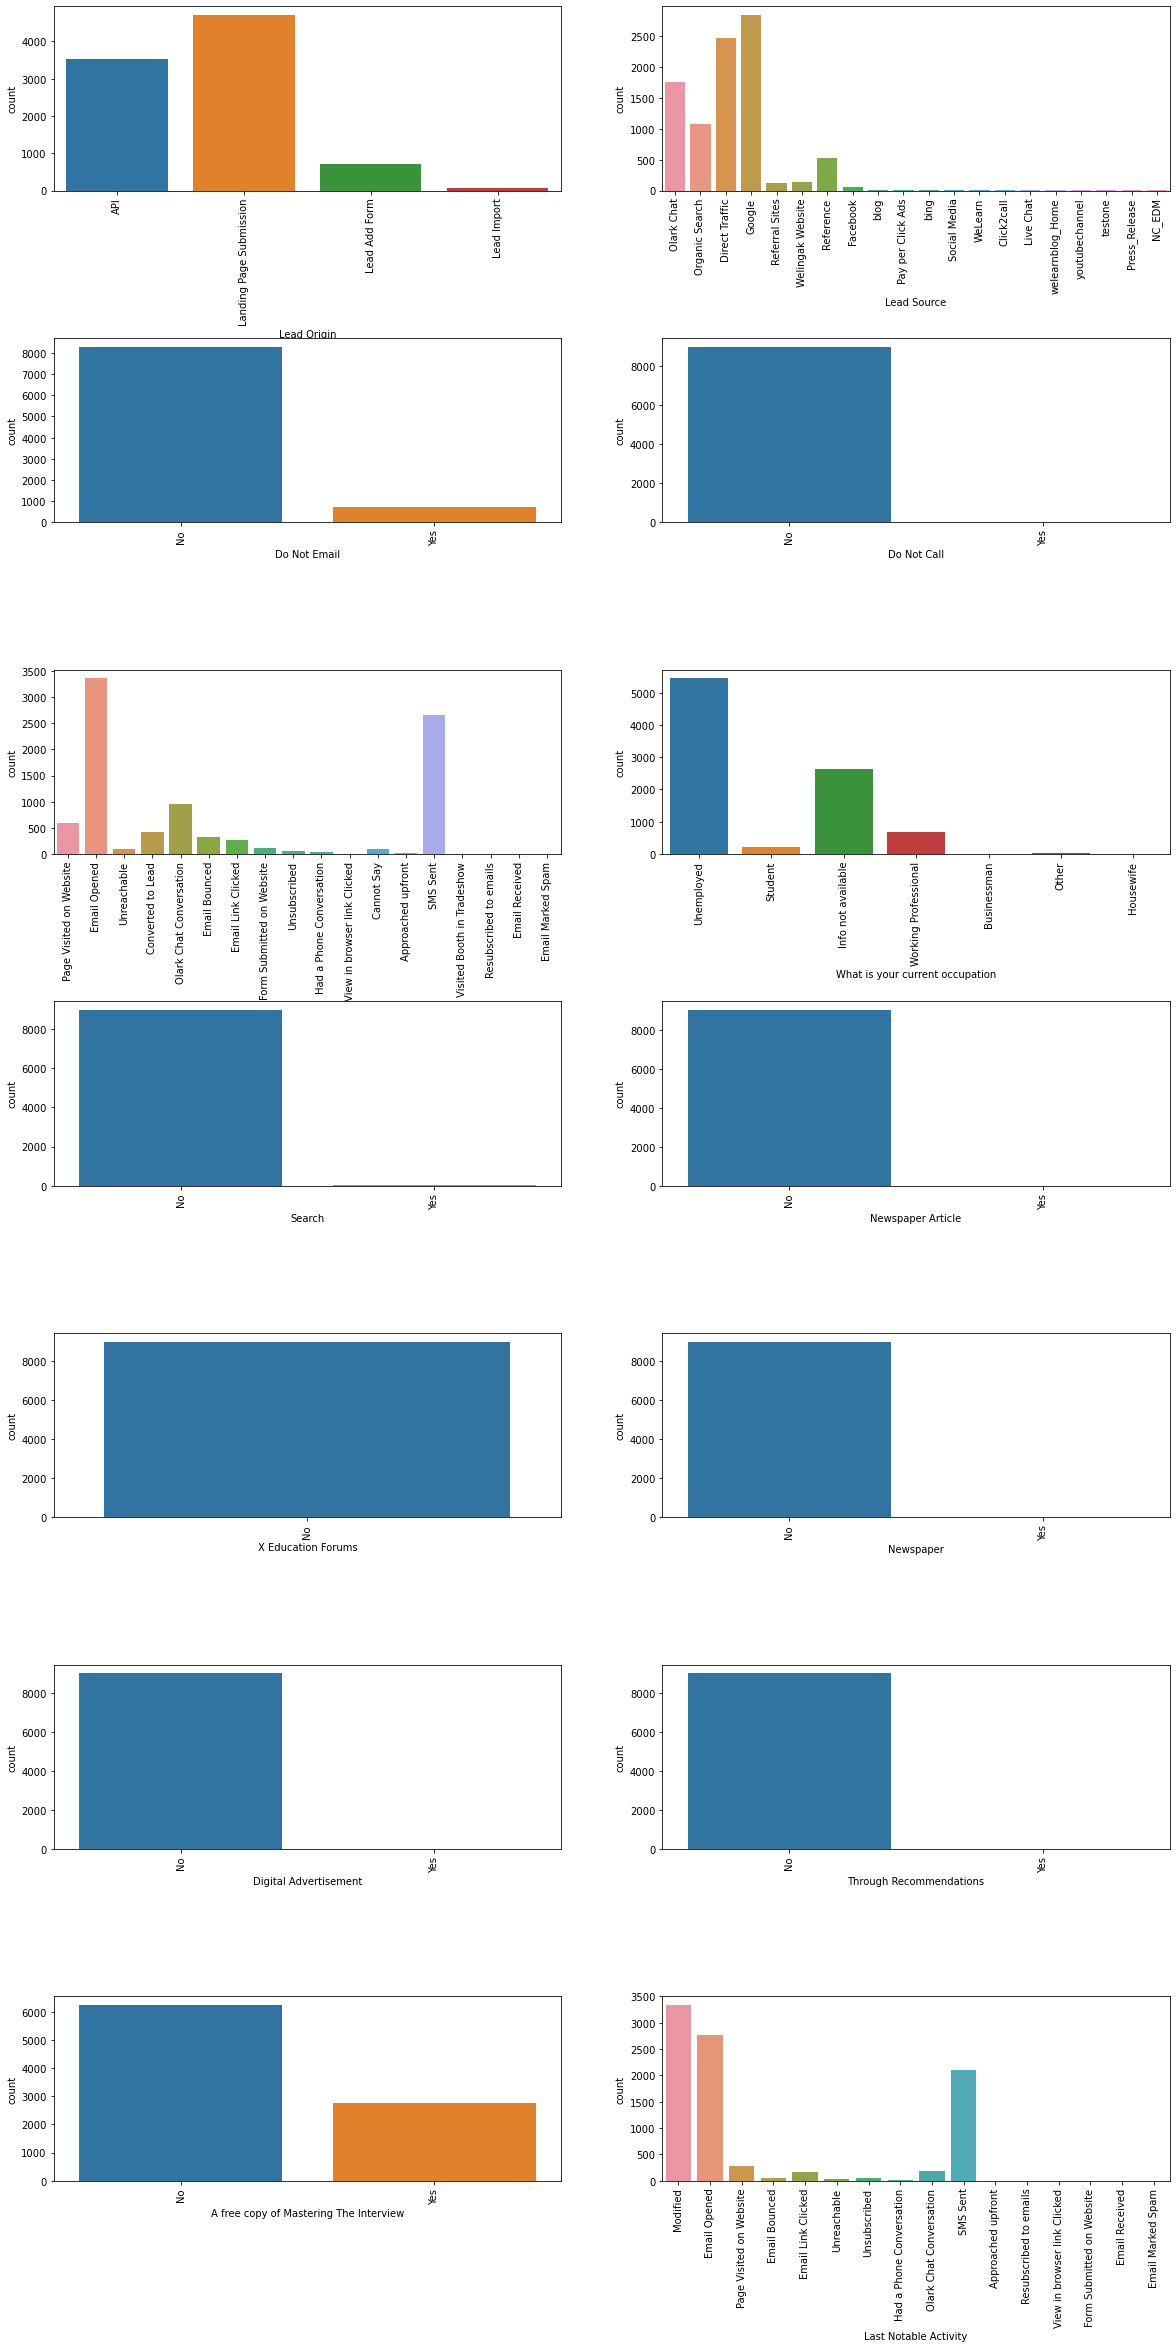

In [72]:
plt.figure(figsize=(20,40))
for i in enumerate(list3):
    plt.subplot(7,2,i[0]+1)
    sns.countplot(lead_df[i[1]]).tick_params(axis = "x", rotation = 90)
    plt.subplots_adjust(hspace=0.8)

## 3.2 Bivariate Analysis

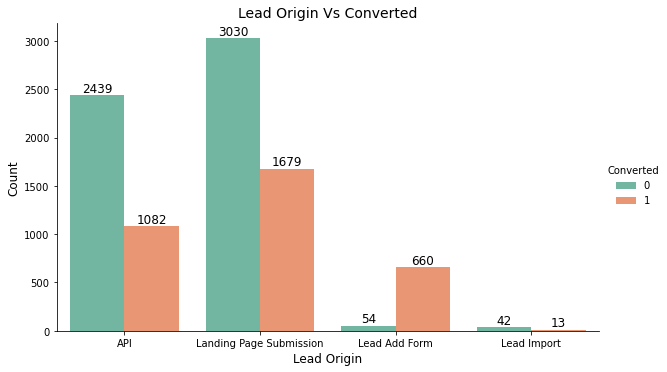

In [73]:
# Checking the coversion rate of lead Origin
graph = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=lead_df, palette="Set2", aspect= 1.7);
plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

- From above plot we can see that "Lead Page Submission" were converted the most in Lead Origin.

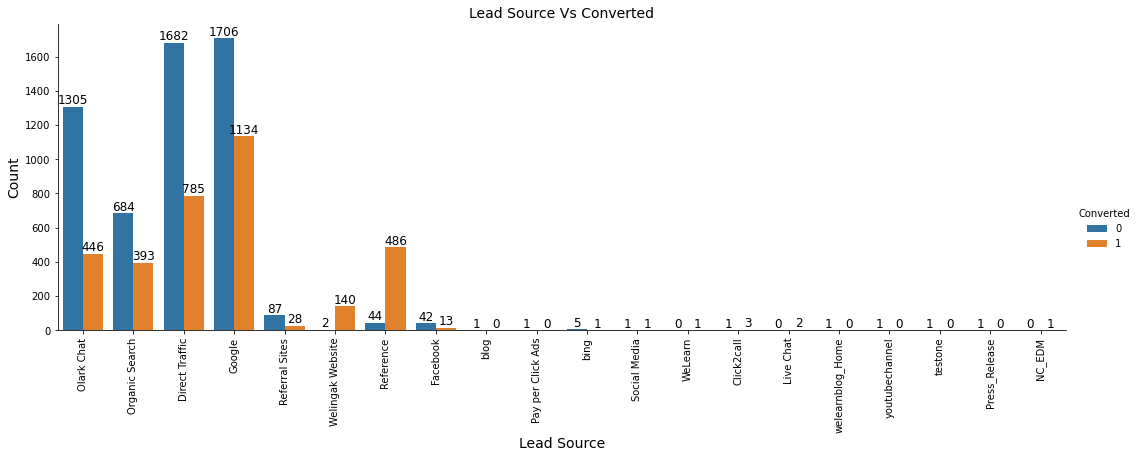

In [74]:
# Checking the coversion rate of lead Source

graph = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=lead_df,  aspect= 3);
plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(rotation = 90)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

- From above plot we can observe that "Direct Traffic" and "Google" were the two most converted category in Lead Source.

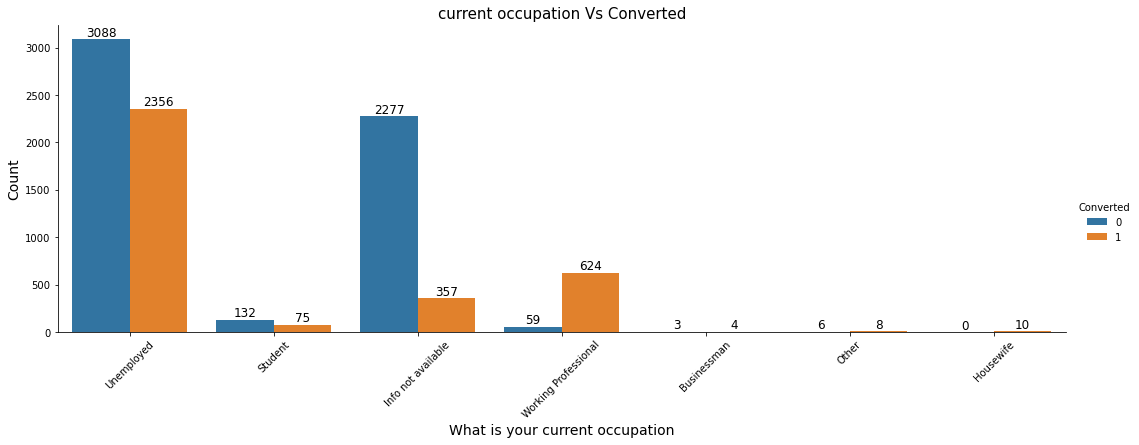

In [75]:
# Checking the coversion rate of "What is your current occupation"

graph = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=lead_df, aspect= 3);
plt.title('current occupation Vs Converted', fontsize = 15)
plt.xlabel("What is your current occupation", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.xticks(rotation = 45)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

- From above plot we can observe that "Unemployed" was the most converted category in Lead Source.

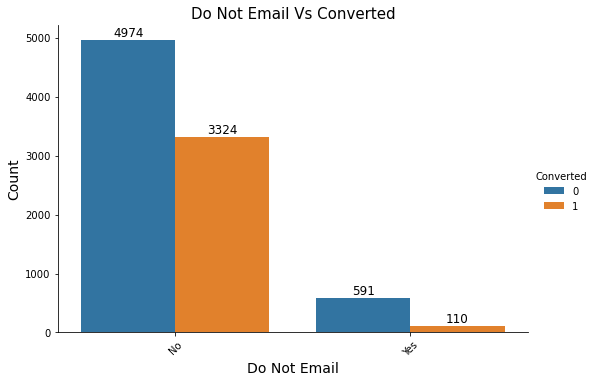

In [76]:
# Checking the coversion rate of "Do not Email"
graph = sns.catplot(x="Do Not Email", hue = "Converted", kind="count", data=lead_df,  aspect= 1.5)
plt.xlabel("Do Not Email", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title('Do Not Email Vs Converted', fontsize = 15)
plt.xticks(rotation = 45)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

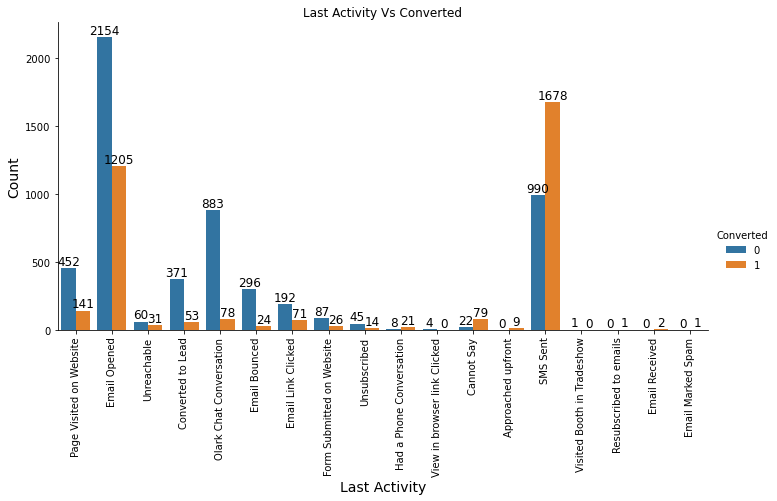

In [77]:
# Checking the coversion rate of "Last Activity"
graph = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=lead_df,  aspect= 2)
plt.xlabel("Last Activity", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Last Activity Vs Converted")
plt.xticks(rotation = 90)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

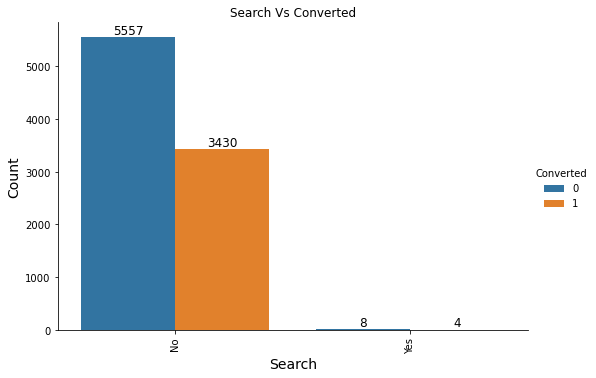

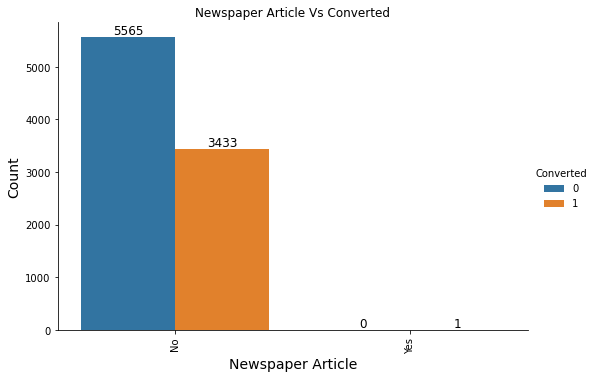

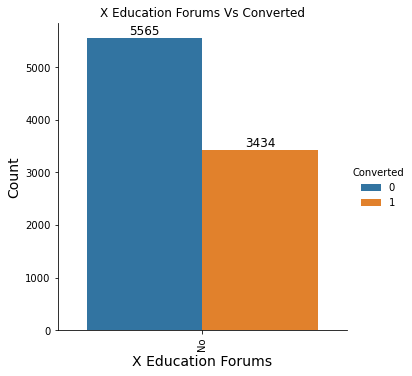

In [78]:
# Checking the coversion rate of "Search"
graph = sns.catplot(x="Search", hue = "Converted", kind="count", data=lead_df,  aspect= 1.5)
plt.xlabel("Search", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Search Vs Converted")
plt.xticks(rotation = 90)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

# Checking the coversion rate of "Newspaper Article"
graph = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=lead_df,  aspect= 1.5)
plt.xlabel("Newspaper Article", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Newspaper Article Vs Converted")
plt.xticks(rotation = 90)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

# Checking the coversion rate of "X Education Forums"
graph = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=lead_df,  aspect= 1)
plt.xlabel("X Education Forums", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("X Education Forums Vs Converted")
plt.xticks(rotation = 90)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

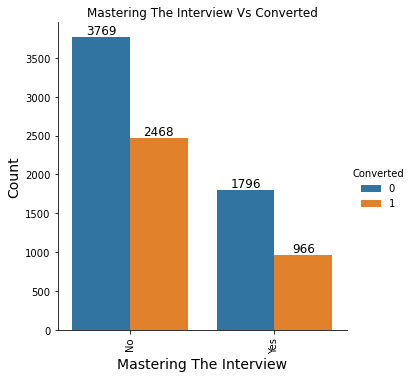

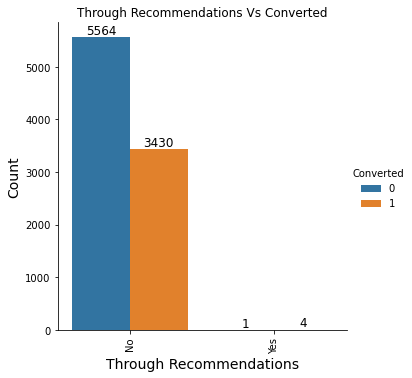

In [79]:
# Checking the coversion rate of "Free copy to Mastering The Interview"
graph = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=lead_df,  aspect= 1)
plt.xlabel("Mastering The Interview", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Mastering The Interview Vs Converted")
plt.xticks(rotation = 90)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

# Checking the coversion rate of "Through Recommendations"
graph = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=lead_df,  aspect= 1)
plt.xlabel("Through Recommendations", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Through Recommendations Vs Converted")
plt.xticks(rotation = 90)

# Print the counts

asx = graph.facet_axis(0,0)
for p in asx.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    asx.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='black', ha='center', va='bottom')
    
plt.show()

**Numerical Data visualization, checking conversion**

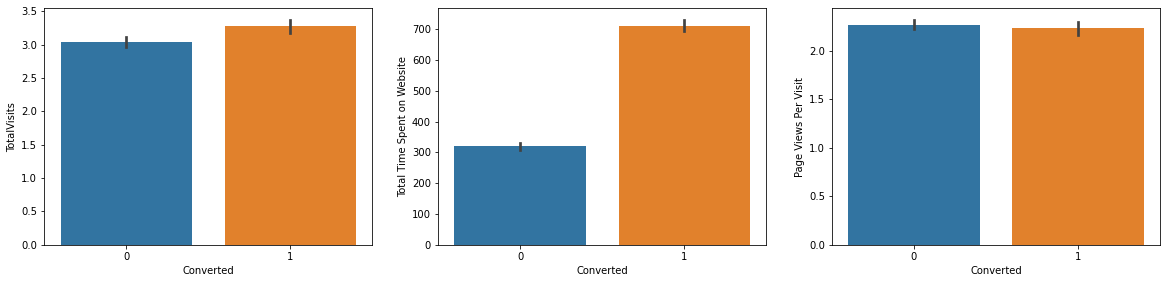

In [80]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = lead_df)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted',  data = lead_df)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = lead_df)
plt.show()

## Step: 4 Data Preparation

**Dummy Variables creation**

In [81]:
object_columns = lead_df.select_dtypes(include=['object']).columns
dummy_list = list(object_columns[1:])
dummy_list

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'What is your current occupation',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [82]:
lead_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'What is your current occupation', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']].head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


In [83]:
lead_df["Lead Source"].value_counts()

Google               2840
Direct Traffic       2467
Olark Chat           1751
Organic Search       1077
Reference             530
Welingak Website      142
Referral Sites        115
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [84]:
lead_df["Lead Origin"].value_counts()

Landing Page Submission    4709
API                        3521
Lead Add Form               714
Lead Import                  55
Name: Lead Origin, dtype: int64

In [85]:
lead_df["Last Activity"].value_counts()

Email Opened                    3359
SMS Sent                        2668
Olark Chat Conversation          961
Page Visited on Website          593
Converted to Lead                424
Email Bounced                    320
Email Link Clicked               263
Form Submitted on Website        113
Cannot Say                       101
Unreachable                       91
Unsubscribed                      59
Had a Phone Conversation          29
Approached upfront                 9
View in browser link Clicked       4
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Email Marked Spam                  1
Name: Last Activity, dtype: int64

In [86]:
lead_df["Last Notable Activity"].value_counts()

Modified                        3334
Email Opened                    2762
SMS Sent                        2112
Page Visited on Website          287
Olark Chat Conversation          181
Email Link Clicked               169
Email Bounced                     58
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          13
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [87]:
# Create dummy variables using the 'get_dummies'
dummy_variable = pd.get_dummies(lead_df[dummy_list],drop_first=True)

In [88]:
dummy_variable.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Cannot Say,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Info not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [89]:
# Concatnate the dummy with main dataframe(lead_df)
lead_df_final = pd.concat([lead_df,dummy_variable], axis=1)
lead_df_final.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Cannot Say,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Info not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
lead_df_final.shape

(8999, 88)

In [91]:
# Droping the original Categorical columns
lead_df_final = lead_df_final.drop(dummy_list, axis=1)
lead_df_final.shape

(8999, 74)

In [92]:
lead_df_final = lead_df_final.drop("Prospect ID", axis=1)

In [93]:
lead_df_final.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Cannot Say,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Info not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [94]:
# Let's Check the null values in the dataframe
round(lead_df_final.isnull().sum()/lead_df_final.shape[0]*100,2)

Lead Number                                             0.0
Converted                                               0.0
TotalVisits                                             0.0
Total Time Spent on Website                             0.0
Page Views Per Visit                                    0.0
Lead Origin_Landing Page Submission                     0.0
Lead Origin_Lead Add Form                               0.0
Lead Origin_Lead Import                                 0.0
Lead Source_Direct Traffic                              0.0
Lead Source_Facebook                                    0.0
Lead Source_Google                                      0.0
Lead Source_Live Chat                                   0.0
Lead Source_NC_EDM                                      0.0
Lead Source_Olark Chat                                  0.0
Lead Source_Organic Search                              0.0
Lead Source_Pay per Click Ads                           0.0
Lead Source_Press_Release               

**So, There are no null values present in the dataframe**

## Step 5:  Spliting the dataset into train and test dataset

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
# Putting feature variables to "X"
X = lead_df_final.drop("Converted", axis=1)
X.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Cannot Say,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Info not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,660728,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,660727,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,660719,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,660681,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [97]:
# Putting Responce Variable to "y"

y = lead_df_final["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=45)

## Step 6: Feature Scaling

In [99]:
# importing the library
from sklearn.preprocessing import MinMaxScaler

In [100]:
X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Cannot Say,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Info not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6266,601761,9.0,1241,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2039,640007,1.0,200,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8268,586757,2.0,780,2.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
927,650484,3.0,388,1.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8317,586357,3.0,752,3.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [101]:
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Cannot Say,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Info not available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6266,601761,0.529412,0.674457,0.333333,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2039,640007,0.058824,0.108696,0.111111,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8268,586757,0.117647,0.423913,0.222222,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
927,650484,0.176471,0.210870,0.166667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8317,586357,0.176471,0.408696,0.333333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [102]:
# Checking the conversion rate
conversion = (sum(lead_df_final["Converted"])/len(lead_df_final["Converted"].index))*100
conversion

38.15979553283698

- The Conversion rate is 38%

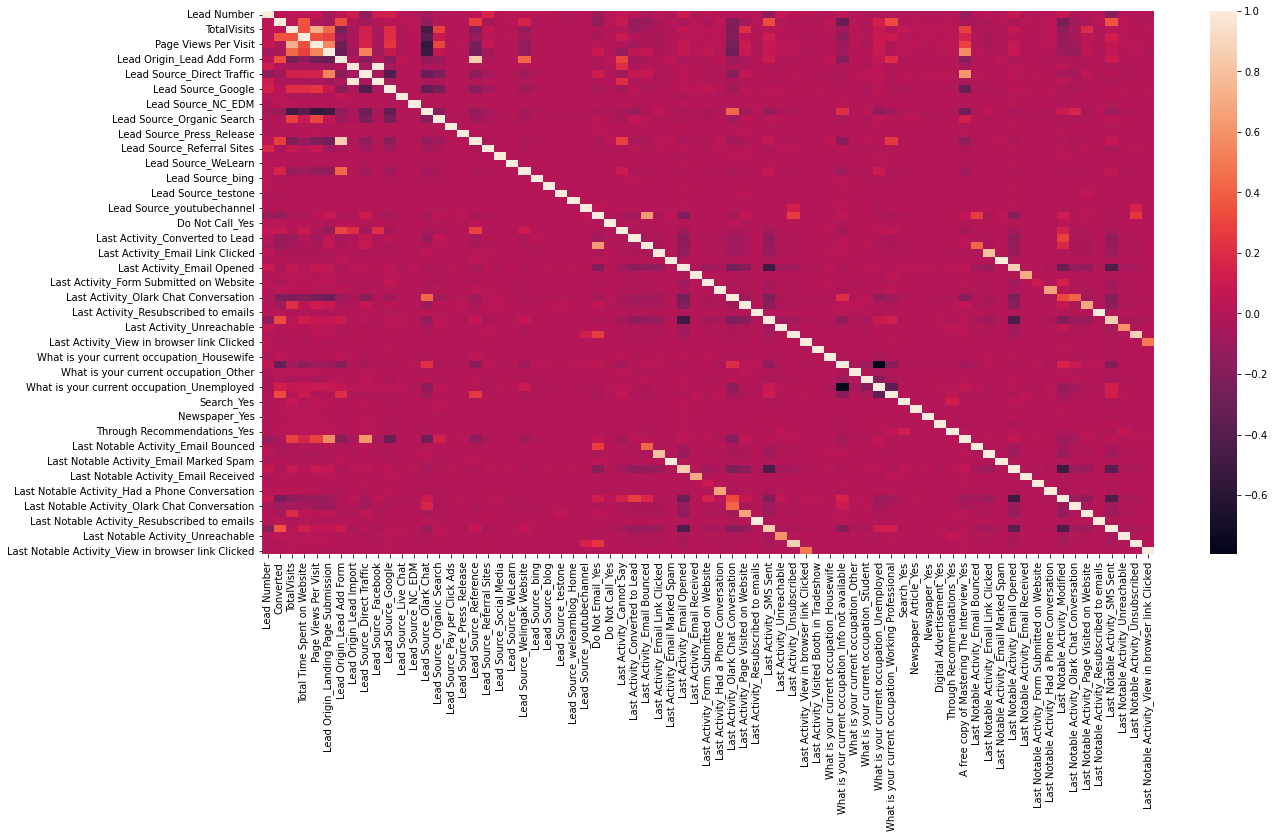

In [103]:
#Let's Check the correlation
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_df_final.corr())
plt.show()

- Since data set has lot of variables , so it is not possible to identify which one to drop on the basis of correlation

## Step: 7 Building the model
**Building the 1st model**

In [104]:
import statsmodels.api as sm

In [105]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6236
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 07 May 2022   Deviance:                   1.3291e+05
Time:                        21:51:38   Pearson chi2:                 6.50e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 5.814e+15   5.75e+07   1.01e+08      0.000    5.81e+15    5.81e+15
Lead Number                                           9.998e+08     38.780   2.58e+07      0.000       1e+09       1e+09
TotalVisits                                           6.107e+14   7.92e+06   7.71e+07      0.000    6.11e+14    6.11e+14
Total Time Spent on Website                           5.966e+14   3.43e+06   1.74e+08      0.000    5.97e+14    5.97e+14
Page Views Per Visit                                 -1.535e+14   6.96e+06  -2.21e+07      0.000   -1.53e+14   -1.53e+14
Lead Origin_Landing Page Submission                  -7.358e+13   2.73e+06   -2.7e+07      0.000   -7.36e+13   -7.36e+13
Lead Origin_Lead Add Form                             6.138e+14   1.35e+07   4.53e+07      0.000    6.14e+14    6.14e+14
Lead Origin_Lead Import                              -1.266e+15    1.9e+07  -6.67e+07      0.000   -1.27e+15   -1.27e+15
Lead Source_Direct Traffic                            -1.25e+15   3.63e+07  -3.45e+07      0.000   -1.25e+15   -1.25e+15
Lead Source_Facebook                                 -1.266e+15    1.9e+07  -6.67e+07      0.000   -1.27e+15   -1.27e+15
Lead Source_Google                                   -1.157e+15   3.61e+07   -3.2e+07      0.000   -1.16e+15   -1.16e+15
Lead Source_Live Chat                                 2.315e+15   5.82e+07   3.98e+07      0.000    2.31e+15    2.31e+15
Lead Source_NC_EDM                                    5468.4724   5.57e-05   9.83e+07      0.000    5468.472    5468.473
Lead Source_Olark Chat                               -9.806e+14   3.64e+07   -2.7e+07      0.000   -9.81e+14   -9.81e+14
Lead Source_Organic Search                           -1.271e+15   3.63e+07   -3.5e+07      0.000   -1.27e+15   -1.27e+15
Lead Source_Pay per Click Ads                        -4.771e+15   7.63e+07  -6.25e+07      0.000   -4.77e+15   -4.77e+15
Lead Source_Press_Release                            -4.098e+15   7.65e+07  -5.35e+07      0.000    -4.1e+15    -4.1e+15
Lead Source_Reference                                -9.548e+14   3.38e+07  -2.82e+07      0.000   -9.55e+14   -9.55e+14
Lead Source_Referral Sites                           -1.458e+15   3.69e+07  -3.95e+07      0.000   -1.46e+15   -1.46e+15
Lead Source_Social Media                             -3.004e+14   5.98e+07  -5.03e+06      0.000      -3e+14      -3e+14
Lead Source_WeLearn                                   3.918e+15   7.63e+07   5.14e+07      0.000    3.92e+15    3.92e+15
Lead Source_Welingak Website                         -3.965e+14   3.43e+07  -1.15e+07      0.000   -3.97e+14   -3.97e+14
Lead Source_bing                                     -1.66

## Step 8: Feature Selection by RFE

In [106]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [107]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg, 20)            
rfe = rfe.fit(X_train, y_train)

In [108]:
rfe.support_

array([ True, False,  True, False,  True,  True, False,  True, False,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False,  True, False, False, False])

In [109]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', True, 1),
 ('TotalVisits', False, 28),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 15),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Live Chat', False, 27),
 ('Lead Source_NC_EDM', False, 52),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Pay per Click Ads', False, 42),
 ('Lead Source_Press_Release', False, 36),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 12),
 ('Lead Source_Social Media', False, 44),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', False, 3),
 ('Lead Source_bing', False, 30),
 ('Lead Source_blog', False, 43),
 ('Lead Source_testone', False, 37),
 ('Lead Source_welearnblog_Home', False, 50),
 ('Lead Sour

In [110]:
# Puting up the list of features selected by the rfe
col = X_train.columns[rfe.support_]
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Info not available',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

###  Rebuilding the model again with rfe selected features
##  Model-2

In [204]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.2
Date:                Sat, 07 May 2022   Deviance:                       4940.4
Time:                        23:10:06   Pearson chi2:                 6.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.7655      1.012     -6.683      0.000      -8.750      -4.781
Lead Number                                            7.95e-06   1.62e-06      4.921      0.000    4.78e-06    1.11e-05
Total Time Spent on Website                              3.8075      0.143     26.696      0.000       3.528       4.087
Lead Origin_Lead Add Form                                4.1861      0.387     10.806      0.000       3.427       4.945
Lead Source_Direct Traffic                              -0.2650      0.087     -3.055      0.002      -0.435      -0.095
Lead Source_Olark Chat                                   1.1761      0.113     10.424      0.000       0.955       1.397
Lead Source_Reference                                   -0.7435      0.429     -1.732      0.083      -1.585       0.098
Do Not Email_Yes                                        -1.3719      0.173     -7.943      0.000      -1.710      -1.033
Last Activity_Converted to Lead                         -0.8091      0.242     -3.344      0.001      -1.283      -0.335
Last Activity_Olark Chat Conversation                   -1.0489      0.182     -5.771      0.000      -1.405      -0.693
Last Activity_SMS Sent                                   1.3390      0.079     16.947      0.000       1.184       1.494
What is your current occupation_Info not available      -1.2756      0.090    -14.101      0.000      -1.453      -1.098
What is your current occupation_Working Professional     2.6409      0.195     13.513      0.000       2.258       3.024
Last Notable Activity_Modified                          -0.7113      0.087     -8.145      0.000      -0.882      -0.540
========================================================================================================================
"""

In [112]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
# Let's check the vif value for all the feature of the model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,824.26
15,What is your current occupation_Unemployed,9.36
14,What is your current occupation_Info not available,8.54
18,Last Notable Activity_Email Opened,7.78
20,Last Notable Activity_SMS Sent,7.11
11,Last Activity_Email Opened,6.15
13,Last Activity_SMS Sent,5.69
19,Last Notable Activity_Modified,4.20
4,Lead Origin_Lead Add Form,4.16
7,Lead Source_Reference,3.83


## Model-3

In [114]:
col = col.drop('What is your current occupation_Unemployed',1)

In [115]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2451.7
Date:                Sat, 07 May 2022   Deviance:                       4903.3
Time:                        21:51:41   Pearson chi2:                 6.44e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.1776      1.036     -6.927      0.000      -9.209      -5.147
Lead Number                                           8.525e-06   1.63e-06      5.229      0.000    5.33e-06    1.17e-05
Total Time Spent on Website                              3.8231      0.143     26.665      0.000       3.542       4.104
Lead Origin_Landing Page Submission                     -0.1410      0.104     -1.350      0.177      -0.346       0.064
Lead Origin_Lead Add Form                                4.1131      0.395     10.413      0.000       3.339       4.887
Lead Source_Direct Traffic                              -0.2052      0.105     -1.949      0.051      -0.412       0.001
Lead Source_Olark Chat                                   1.0811      0.127      8.506      0.000       0.832       1.330
Lead Source_Reference                                   -0.7834      0.432     -1.815      0.070      -1.629       0.063
Do Not Email_Yes                                        -1.1901      0.197     -6.042      0.000      -1.576      -0.804
Last Activity_Converted to Lead                         -0.7687      0.264     -2.914      0.004      -1.286      -0.252
Last Activity_Email Bounced                             -0.5602      0.400     -1.400      0.162      -1.344       0.224
Last Activity_Email Opened                               0.5820      0.184      3.168      0.002       0.222       0.942
Last Activity_Olark Chat Conversation                   -0.9839      0.203     -4.855      0.000      -1.381      -0.587
Last Activity_SMS Sent                                   0.9318      0.192      4.848      0.000       0.555       1.308
What is your current occupation_Info not available      -1.2531      0.091    -13.715      0.000      -1.432      -1.074
What is your current occupation_Working Professional     2.6649      0.197     13.543      0.000       2.279       3.051
A free copy of Mastering The Interview_Yes              -0.0142      0.102     -0.138      0.890      -0.215       0.186
Last Notable Activity_Email Opened                      -0.5034      0.223     -2.258      0.024      -0.940      -0.067
Last Notable Activity_Modified                          -0.6416      0.173     -3.713      0.000      -0.980      -0.303
Last Notable Activity_SMS Sent                           0.6522      0.233      2.800      0.005       0.196       1.109
========================================================================================================================
"""

In [116]:
# Let's check the vif value for all the feature of the model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,801.01
17,Last Notable Activity_Email Opened,7.78
19,Last Notable Activity_SMS Sent,7.11
11,Last Activity_Email Opened,6.15
13,Last Activity_SMS Sent,5.69
18,Last Notable Activity_Modified,4.20
4,Lead Origin_Lead Add Form,4.16
7,Lead Source_Reference,3.82
3,Lead Origin_Landing Page Submission,2.29
12,Last Activity_Olark Chat Conversation,2.00


## Model-4

In [117]:
col = col.drop('Last Notable Activity_Email Opened',1)

In [118]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2454.2
Date:                Sat, 07 May 2022   Deviance:                       4908.4
Time:                        21:51:41   Pearson chi2:                 6.50e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -7.3004      1.035     -7.056      0.000      -9.328      -5.272
Lead Number                                           8.468e-06   1.63e-06      5.199      0.000    5.28e-06    1.17e-05
Total Time Spent on Website                              3.8217      0.143     26.665      0.000       3.541       4.103
Lead Origin_Landing Page Submission                     -0.1473      0.104     -1.411      0.158      -0.352       0.057
Lead Origin_Lead Add Form                                4.1323      0.396     10.434      0.000       3.356       4.909
Lead Source_Direct Traffic                              -0.1987      0.105     -1.889      0.059      -0.405       0.007
Lead Source_Olark Chat                                   1.0837      0.127      8.522      0.000       0.834       1.333
Lead Source_Reference                                   -0.8058      0.433     -1.863      0.062      -1.654       0.042
Do Not Email_Yes                                        -1.1734      0.197     -5.969      0.000      -1.559      -0.788
Last Activity_Converted to Lead                         -0.9102      0.255     -3.565      0.000      -1.411      -0.410
Last Activity_Email Bounced                             -0.6181      0.398     -1.552      0.121      -1.399       0.163
Last Activity_Email Opened                               0.2723      0.122      2.227      0.026       0.033       0.512
Last Activity_Olark Chat Conversation                   -1.0511      0.200     -5.255      0.000      -1.443      -0.659
Last Activity_SMS Sent                                   0.7876      0.180      4.375      0.000       0.435       1.141
What is your current occupation_Info not available      -1.2439      0.091    -13.642      0.000      -1.423      -1.065
What is your current occupation_Working Professional     2.6695      0.197     13.560      0.000       2.284       3.055
A free copy of Mastering The Interview_Yes              -0.0152      0.102     -0.148      0.882      -0.216       0.185
Last Notable Activity_Modified                          -0.3410      0.111     -3.070      0.002      -0.559      -0.123
Last Notable Activity_SMS Sent                           0.9530      0.192      4.971      0.000       0.577       1.329
========================================================================================================================
"""

In [119]:
# Let's check the vif value for all the feature of the model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,799.84
18,Last Notable Activity_SMS Sent,5.46
13,Last Activity_SMS Sent,5.33
4,Lead Origin_Lead Add Form,4.16
7,Lead Source_Reference,3.82
11,Last Activity_Email Opened,2.78
3,Lead Origin_Landing Page Submission,2.28
17,Last Notable Activity_Modified,2.12
6,Lead Source_Olark Chat,2.00
12,Last Activity_Olark Chat Conversation,1.95


## Model-5

In [120]:
col = col.drop('Last Notable Activity_SMS Sent',1)

In [121]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2466.7
Date:                Sat, 07 May 2022   Deviance:                       4933.4
Time:                        21:51:42   Pearson chi2:                 6.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.7307      1.024     -6.574      0.000      -8.737      -4.724
Lead Number                                           7.849e-06   1.62e-06      4.852      0.000    4.68e-06     1.1e-05
Total Time Spent on Website                              3.8166      0.143     26.706      0.000       3.537       4.097
Lead Origin_Landing Page Submission                     -0.1401      0.104     -1.347      0.178      -0.344       0.064
Lead Origin_Lead Add Form                                4.0931      0.394     10.377      0.000       3.320       4.866
Lead Source_Direct Traffic                              -0.1947      0.105     -1.857      0.063      -0.400       0.011
Lead Source_Olark Chat                                   1.0895      0.127      8.594      0.000       0.841       1.338
Lead Source_Reference                                   -0.7524      0.431     -1.744      0.081      -1.598       0.093
Do Not Email_Yes                                        -1.1870      0.196     -6.058      0.000      -1.571      -0.803
Last Activity_Converted to Lead                         -0.7538      0.254     -2.968      0.003      -1.252      -0.256
Last Activity_Email Bounced                             -0.5665      0.399     -1.419      0.156      -1.349       0.216
Last Activity_Email Opened                               0.1508      0.120      1.258      0.208      -0.084       0.386
Last Activity_Olark Chat Conversation                   -0.9839      0.200     -4.914      0.000      -1.376      -0.591
Last Activity_SMS Sent                                   1.4387      0.123     11.738      0.000       1.199       1.679
What is your current occupation_Info not available      -1.2825      0.091    -14.167      0.000      -1.460      -1.105
What is your current occupation_Working Professional     2.6550      0.197     13.495      0.000       2.269       3.041
A free copy of Mastering The Interview_Yes              -0.0385      0.102     -0.378      0.705      -0.238       0.161
Last Notable Activity_Modified                          -0.6684      0.091     -7.332      0.000      -0.847      -0.490
========================================================================================================================
"""

In [122]:
# Let's check the vif value for all the feature of the model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,793.88
4,Lead Origin_Lead Add Form,4.16
7,Lead Source_Reference,3.82
11,Last Activity_Email Opened,2.67
13,Last Activity_SMS Sent,2.46
3,Lead Origin_Landing Page Submission,2.28
6,Lead Source_Olark Chat,1.99
12,Last Activity_Olark Chat Conversation,1.93
16,A free copy of Mastering The Interview_Yes,1.82
10,Last Activity_Email Bounced,1.76


## Model-6

In [123]:
col = col.drop('A free copy of Mastering The Interview_Yes',1)

In [124]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2466.8
Date:                Sat, 07 May 2022   Deviance:                       4933.6
Time:                        21:51:42   Pearson chi2:                 6.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.7398      1.024     -6.585      0.000      -8.746      -4.734
Lead Number                                           7.861e-06   1.62e-06      4.860      0.000    4.69e-06     1.1e-05
Total Time Spent on Website                              3.8160      0.143     26.706      0.000       3.536       4.096
Lead Origin_Landing Page Submission                     -0.1515      0.100     -1.522      0.128      -0.347       0.044
Lead Origin_Lead Add Form                                4.0932      0.394     10.378      0.000       3.320       4.866
Lead Source_Direct Traffic                              -0.2126      0.094     -2.273      0.023      -0.396      -0.029
Lead Source_Olark Chat                                   1.0889      0.127      8.588      0.000       0.840       1.337
Lead Source_Reference                                   -0.7529      0.431     -1.745      0.081      -1.599       0.093
Do Not Email_Yes                                        -1.1859      0.196     -6.056      0.000      -1.570      -0.802
Last Activity_Converted to Lead                         -0.7522      0.254     -2.963      0.003      -1.250      -0.255
Last Activity_Email Bounced                             -0.5633      0.399     -1.412      0.158      -1.345       0.218
Last Activity_Email Opened                               0.1516      0.120      1.266      0.206      -0.083       0.386
Last Activity_Olark Chat Conversation                   -0.9837      0.200     -4.911      0.000      -1.376      -0.591
Last Activity_SMS Sent                                   1.4397      0.123     11.749      0.000       1.200       1.680
What is your current occupation_Info not available      -1.2827      0.091    -14.167      0.000      -1.460      -1.105
What is your current occupation_Working Professional     2.6566      0.197     13.503      0.000       2.271       3.042
Last Notable Activity_Modified                          -0.6676      0.091     -7.325      0.000      -0.846      -0.489
========================================================================================================================
"""

In [125]:
# Let's check the vif value for all the feature of the model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,793.31
4,Lead Origin_Lead Add Form,4.16
7,Lead Source_Reference,3.82
11,Last Activity_Email Opened,2.67
13,Last Activity_SMS Sent,2.45
3,Lead Origin_Landing Page Submission,2.07
6,Lead Source_Olark Chat,1.99
12,Last Activity_Olark Chat Conversation,1.93
10,Last Activity_Email Bounced,1.76
8,Do Not Email_Yes,1.72


## Model-7

In [126]:
col = col.drop('Last Activity_Email Opened',1)

In [203]:
col

Index(['Lead Number', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Olark Chat', 'Lead Source_Reference', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Info not available',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified'],
      dtype='object')

In [127]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6299
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2467.6
Date:                Sat, 07 May 2022   Deviance:                       4935.2
Time:                        21:51:42   Pearson chi2:                 6.52e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -6.6018      1.017     -6.491      0.000      -8.595      -4.608
Lead Number                                           7.844e-06   1.62e-06      4.852      0.000    4.68e-06     1.1e-05
Total Time Spent on Website                              3.8080      0.143     26.690      0.000       3.528       4.088
Lead Origin_Landing Page Submission                     -0.1523      0.099     -1.531      0.126      -0.347       0.043
Lead Origin_Lead Add Form                                4.0966      0.394     10.395      0.000       3.324       4.869
Lead Source_Direct Traffic                              -0.2120      0.093     -2.268      0.023      -0.395      -0.029
Lead Source_Olark Chat                                   1.0891      0.127      8.589      0.000       0.841       1.338
Lead Source_Reference                                   -0.7544      0.431     -1.749      0.080      -1.600       0.091
Do Not Email_Yes                                        -1.2168      0.194     -6.280      0.000      -1.597      -0.837
Last Activity_Converted to Lead                         -0.8452      0.243     -3.483      0.000      -1.321      -0.370
Last Activity_Email Bounced                             -0.6404      0.394     -1.626      0.104      -1.412       0.132
Last Activity_Olark Chat Conversation                   -1.0873      0.183     -5.957      0.000      -1.445      -0.730
Last Activity_SMS Sent                                   1.3225      0.080     16.602      0.000       1.166       1.479
What is your current occupation_Info not available      -1.2813      0.091    -14.154      0.000      -1.459      -1.104
What is your current occupation_Working Professional     2.6551      0.197     13.506      0.000       2.270       3.040
Last Notable Activity_Modified                          -0.6985      0.088     -7.954      0.000      -0.871      -0.526
========================================================================================================================
"""

In [128]:
# Let's check the vif value for all the feature of the model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,786.85
4,Lead Origin_Lead Add Form,4.16
7,Lead Source_Reference,3.82
3,Lead Origin_Landing Page Submission,2.07
6,Lead Source_Olark Chat,1.99
10,Last Activity_Email Bounced,1.71
8,Do Not Email_Yes,1.66
11,Last Activity_Olark Chat Conversation,1.48
5,Lead Source_Direct Traffic,1.42
15,Last Notable Activity_Modified,1.36


In [132]:
# let's check the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6266    0.616516
2039    0.062305
8268    0.906373
927     0.143849
8317    0.150920
1142    0.290100
932     0.058441
118     0.297102
536     0.807556
9027    0.373291
dtype: float64

In [133]:
# Reshaping the data
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61651641, 0.06230496, 0.90637316, 0.14384907, 0.15092007,
       0.29009998, 0.05844141, 0.2971023 , 0.80755576, 0.37329129])

In [134]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.616516,6266
1,0,0.062305,2039
2,1,0.906373,8268
3,0,0.143849,927
4,0,0.150920,8317


In [135]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.616516,6266,1
1,0,0.062305,2039,0
2,1,0.906373,8268,1
3,0,0.143849,927,0
4,0,0.150920,8317,0


In [136]:
from sklearn import metrics

In [137]:
# let's create the Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3488  427]
 [ 706 1678]]


In [138]:
# Predicted     not_converted    converted
# Actual
# not_converted        3447      468
# converted            736       1648

In [139]:
# Let's see the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8201301793935545


In [140]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [141]:
# Let's see what is the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7038590604026845

In [142]:
#  specificity caluculation
TN / float(TN+FP)

0.8909323116219668

In [143]:
# Calculating the false postive rate 
# predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.10906768837803321


In [144]:
# positive predictive value calculation

print (TP / float(TP+FP))

0.7971496437054632


In [145]:
# Negative predictive value calculation
print (TN / float(TN+ FN))

0.8316642823080591


## Step 9: Evaluation of model 
### Plotting the ROC Curve

In [146]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

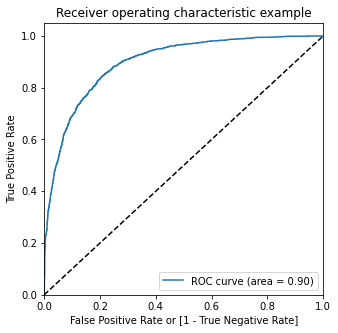

In [148]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 10: Lets seek out Optimal Cutoff Point

In [149]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.616516,6266,1,1,1,1,1,1,1,1,0,0,0
1,0,0.062305,2039,0,1,0,0,0,0,0,0,0,0,0
2,1,0.906373,8268,1,1,1,1,1,1,1,1,1,1,1
3,0,0.143849,927,0,1,1,0,0,0,0,0,0,0,0
4,0,0.150920,8317,0,1,1,0,0,0,0,0,0,0,0


In [150]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.378473  1.000000  0.000000
0.1   0.1  0.646293  0.973574  0.446999
0.2   0.2  0.767106  0.921980  0.672797
0.3   0.3  0.803620  0.865772  0.765773
0.4   0.4  0.818860  0.778523  0.843423
0.5   0.5  0.820130  0.703859  0.890932
0.6   0.6  0.815050  0.642198  0.920307
0.7   0.7  0.791554  0.534396  0.948148
0.8   0.8  0.768852  0.441275  0.968327
0.9   0.9  0.726623  0.297819  0.987739


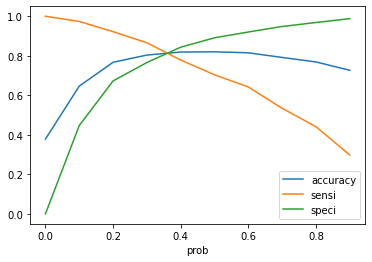

In [151]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

- From above plot we can observe that the optimum cut can be 0.38

In [205]:
# Let us make the final prediction using 0.38 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.616516,6266,1,1,1,1,1,1,1,1,0,0,0,1,62
1,0,0.062305,2039,0,1,0,0,0,0,0,0,0,0,0,0,6
2,1,0.906373,8268,1,1,1,1,1,1,1,1,1,1,1,1,91
3,0,0.143849,927,0,1,1,0,0,0,0,0,0,0,0,0,14
4,0,0.150920,8317,0,1,1,0,0,0,0,0,0,0,0,0,15


In [153]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.616516,6266,1,1,1,1,1,1,1,1,0,0,0,1,62
1,0,0.062305,2039,0,1,0,0,0,0,0,0,0,0,0,0,6
2,1,0.906373,8268,1,1,1,1,1,1,1,1,1,1,1,1,91
3,0,0.143849,927,0,1,1,0,0,0,0,0,0,0,0,0,14
4,0,0.150920,8317,0,1,1,0,0,0,0,0,0,0,0,0,15
5,0,0.290100,1142,0,1,1,1,0,0,0,0,0,0,0,0,29
6,0,0.058441,932,0,1,0,0,0,0,0,0,0,0,0,0,6
7,0,0.297102,118,0,1,1,1,0,0,0,0,0,0,0,0,30
8,0,0.807556,536,1,1,1,1,1,1,1,1,1,1,0,1,81
9,1,0.373291,9027,0,1,1,1,1,0,0,0,0,0,0,0,37


In [154]:
# checking if 80% cases are correctly predicted based on the converted column.
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1899
0     485
Name: final_predicted, dtype: int64

In [155]:
# let's check the precentage of final_predicted conversions
1881/float(1881+503)

0.7890100671140939

- Here we can see that our model final_predicted conversions almost 80%(0.79)

In [156]:
# Let's check what is the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8158437847277346

In [157]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3240,  675],
       [ 485, 1899]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Let's see the sensitivity of model

TP / float(TP+FN)

0.7965604026845637

In [160]:
# Let us calculate specificity

TN / float(TN+FP)

0.8275862068965517

In [161]:
# Calculating false postive rate 
# (predicting conversions when leads has not converted)

print(FP/ float(TN+FP))

0.1724137931034483


In [162]:
# calculating Positive predictive value 

print (TP / float(TP+FP))

0.7377622377622378


In [163]:
# Calculating Negative predictive value

print (TN / float(TN+ FN))

0.8697986577181208


In [164]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3488,  427],
       [ 706, 1678]], dtype=int64)

### Lets create tradeoff between Precision and recall

In [165]:
from sklearn.metrics import precision_score, recall_score

In [166]:
# calculating the precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7971496437054632

In [167]:
# let's calculate the value of recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7038590604026845

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       1
 10      1
 11      0
 12      1
 13      0
 14      1
 15      0
 16      0
 17      1
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      0
 25      1
 26      0
 27      0
 28      1
 29      0
 30      0
 31      1
 32      0
 33      1
 34      0
 35      0
 36      0
 37      1
 38      1
 39      0
 40      0
 41      0
 42      1
 43      0
 44      0
 45      1
 46      1
 47      0
 48      1
 49      1
 50      0
 51      0
 52      0
 53      0
 54      0
 55      0
 56      1
 57      0
 58      0
 59      1
 60      0
 61      0
 62      0
 63      0
 64      0
 65      0
 66      0
 67      0
 68      0
 69      0
 70      1
 71      0
 72      1
 73      0
 74      1
 75      1
 76      0
 77      0
 78      0
 79      0
 80      1
 81      0
 82      1
 83      0
 84      1
 85      0
 86      1
 87      0
 88      0
 89      0
 90      0

In [170]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

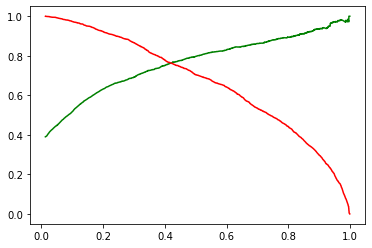

In [171]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step : 11 Now use model to make Prediction on the Test set

In [172]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [173]:
X_test = X_test[col]
X_test.head()

,Lead Number,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Olark Chat,Lead Source_Reference,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Info not available,What is your current occupation_Working Professional,Last Notable Activity_Modified
1850,641547,0.110870,1,0,0,0,0,0,0,0,0,0,1,0,0
6450,600517,0.707065,0,0,0,0,0,0,0,0,0,1,0,0,0
8114,587889,0.760326,1,0,1,0,0,0,0,0,0,0,0,0,1
8822,582587,0.000000,0,0,0,1,0,0,0,0,1,0,0,0,1
6626,598955,0.702174,1,0,1,0,0,0,0,0,0,0,0,0,0


In [174]:
X_test_sm = sm.add_constant(X_test)

In [175]:
y_test_pred = res.predict(X_test_sm)

In [176]:
y_test_pred[:10]

1850    0.070374
6450    0.893189
8114    0.460615
8822    0.061303
6626    0.600127
5570    0.320923
1300    0.667558
2412    0.147308
1504    0.316282
6808    0.057043
dtype: float64

In [177]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [178]:
# Let's see the head

y_pred_1.head()

,0
1850,0.070374
6450,0.893189
8114,0.460615
8822,0.061303
6626,0.600127


In [179]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [180]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [181]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [182]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [183]:
y_pred_final.head()

,Converted,LeadId,0
0,0,1850,0.070374
1,1,6450,0.893189
2,0,8114,0.460615
3,0,8822,0.061303
4,1,6626,0.600127


In [184]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [185]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [186]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,1850,0,0.070374
1,6450,1,0.893189
2,8114,0,0.460615
3,8822,0,0.061303
4,6626,1,0.600127


In [187]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.38%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.38 else 0)

In [188]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,1850,0,0.070374,0
1,6450,1,0.893189,1
2,8114,0,0.460615,1
3,8822,0,0.061303,0
4,6626,1,0.600127,1


In [189]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,1850,0,0.070374,0,7
1,6450,1,0.893189,1,89
2,8114,0,0.460615,1,46
3,8822,0,0.061303,0,6
4,6626,1,0.600127,1,60
5,5570,0,0.320923,0,32
6,1300,1,0.667558,1,67
7,2412,0,0.147308,0,15
8,1504,0,0.316282,0,32
9,6808,0,0.057043,0,6


In [190]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    803
0    247
Name: final_predicted, dtype: int64

In [191]:
# check the precentage of final_predicted conversions on test data

795/float(795+255)

0.7571428571428571

In [192]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8085185185185185

In [193]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1380,  270],
       [ 247,  803]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7965604026845637

In [196]:
# Let us calculate specificity
TN / float(TN+FP)

0.8275862068965517

In [197]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7483690587138863
recall  0.7647619047619048


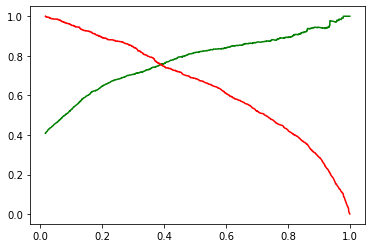

In [198]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Colclusion:
#### overall this seems to be a good model as it has :
    - Accuracy- 80.85%, Sensitivity- 79.65% and Specificity- 82% values of test set
     which are approximately closer to the respective values calculated using trained set.